## **Data Analysis Python Project—Blinkit Analysis**

###  **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###  **Import Raw Data**

In [2]:
df=pd.read_csv("C:/Users/Ankit/Downloads/blinkit_data.csv")

###  **Sample Data**

In [3]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


###  **Size of Data Data**

In [4]:
print("Size of Data:",df.shape)

Size of Data: (8523, 12)


###  **Columns info**

In [5]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='str')

###  **Data Types**

In [6]:
df.dtypes

Item Fat Content                 str
Item Identifier                  str
Item Type                        str
Outlet Establishment Year      int64
Outlet Identifier                str
Outlet Location Type             str
Outlet Size                      str
Outlet Type                      str
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

###  **Data Cleaning**

In [8]:
print(df['Item Fat Content'].unique())

<StringArray>
['Regular', 'Low Fat', 'low fat', 'LF', 'reg']
Length: 5, dtype: str


In [10]:
df['Item Fat Content']=df['Item Fat Content'].replace({'LF':'Low Fat',
                                                       'low fat':'Low Fat',
                                                       'reg':'Regular'})

In [34]:
print(df['Item Fat Content'].unique())

<StringArray>
['Regular', 'Low Fat']
Length: 2, dtype: str


In [9]:
df['Item Weight']=df['Item Weight'].fillna(0,inplace=False)
df['Item Weight'].isna().sum()

np.int64(0)

###  **Business Requirements**

###  **KPI's Req**

In [11]:
# Total Sales
total_sales=df['Sales'].sum()
#Avg Sales
Avg_Sales=df['Sales'].mean()
#No of item sold
No_of_Item_Sold=df['Sales'].count()
#Avg rating
Avg_Rating=df['Rating'].mean()

#Display

print(f"Total Sales:${total_sales:,.0f}")
print(f"Avg Sales:${Avg_Sales:,.0f}")
print(f"No of item Sold:{No_of_Item_Sold:,.0f}")
print(f"Avg Rating:{Avg_Rating:,.1f}")

Total Sales:$1,201,681
Avg Sales:$141
No of item Sold:8,523
Avg Rating:4.0


###  **Charts Req**

###  **Total Sales by Fat Content**

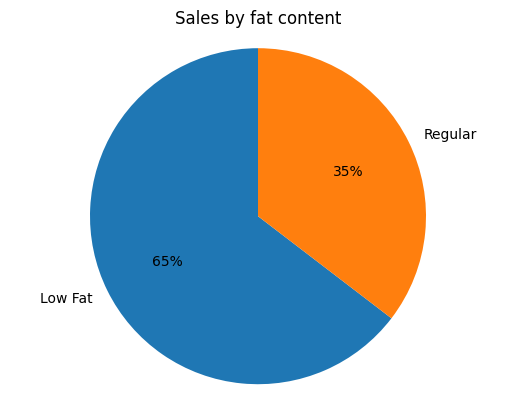

In [12]:
sales_by_fat=df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat,labels=sales_by_fat.index,startangle=90,
       autopct='%.0f%%'
       )
plt.title('Sales by fat content')
plt.axis('equal')
plt.show()


###  **Total Sales by Item Type**

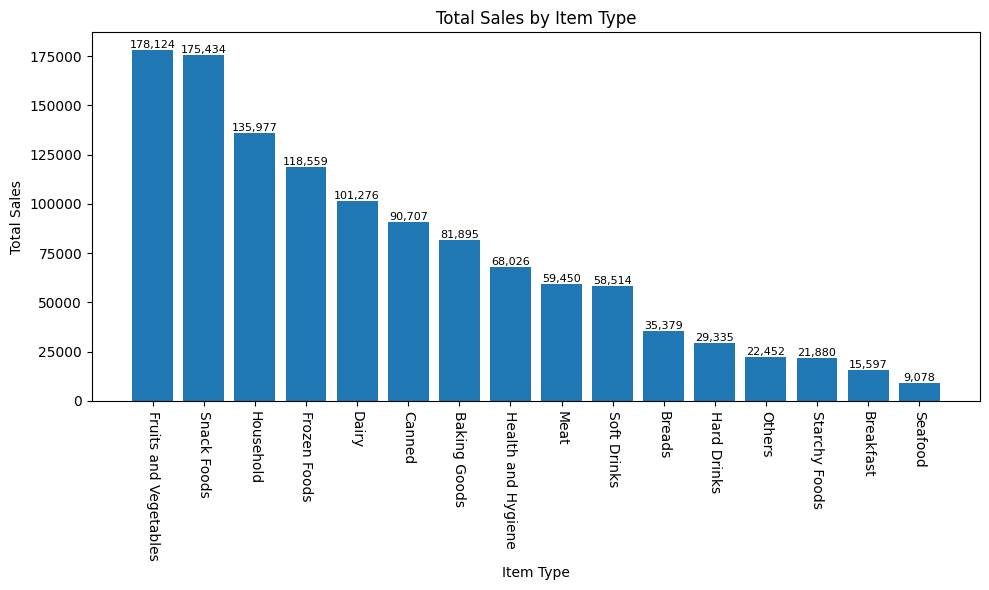

In [17]:
sales_by_type=df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_type.index,sales_by_type.values)

plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,bar.get_height(),
            f'{bar.get_height():,.0f}',ha='center', va='bottom',fontsize=8)

plt.tight_layout()
plt.show()

###  **Fat Content by Outlet for Total Sales**

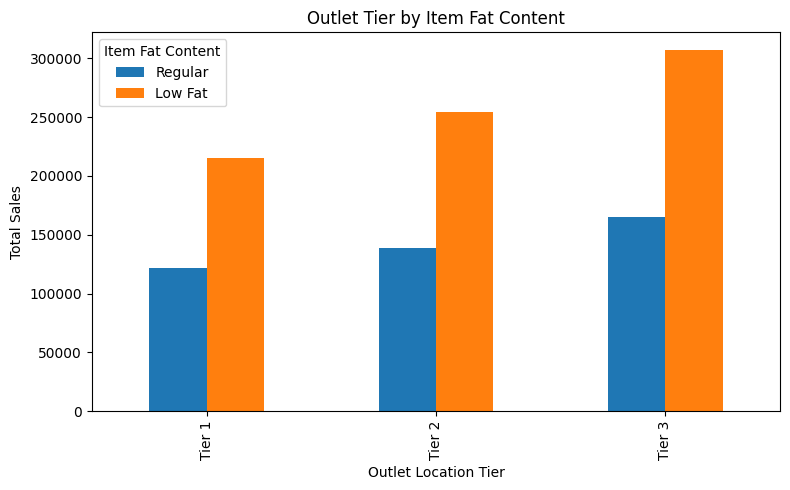

In [18]:
grouped=df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped=grouped[['Regular','Low Fat']]

ax=grouped.plot(kind='bar',figsize=(8,5),title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()


###  **Total Sales by Outlet Establishment**

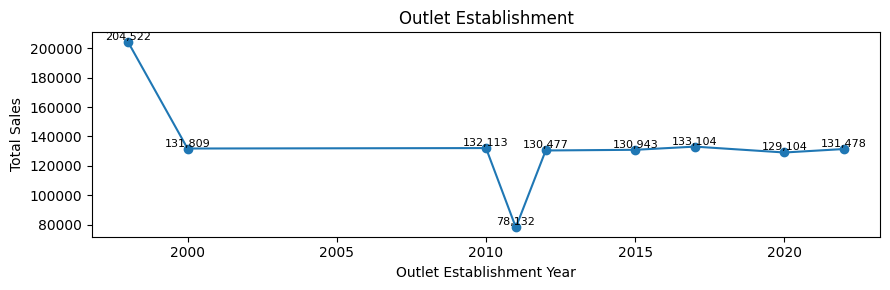

In [25]:
Sales_By_year=df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9,3))
plt.plot(Sales_By_year.index,Sales_By_year.values, marker='o',linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x,y in zip(Sales_By_year.index,Sales_By_year.values):
    plt.text(x,y, f'{y:,.0f}', ha ='center',va ='bottom',fontsize=8)

plt.tight_layout()
plt.show()






###  **Sales by Outlet Size**

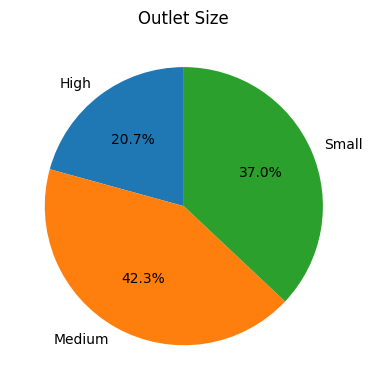

In [27]:
Sales_by_size=df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(Sales_by_size,labels=Sales_by_size.index,autopct='%1.1f%%',startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()












###  **Sales by Outlet Location**

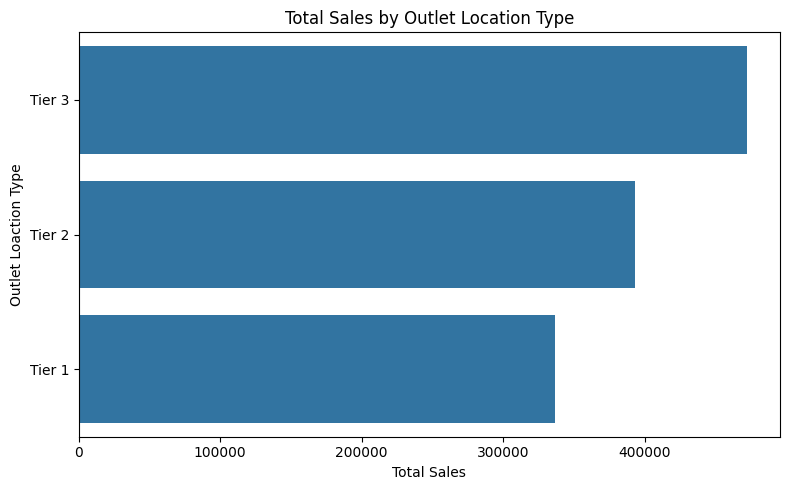

In [33]:
sales_by_loaction=df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_loaction=sales_by_loaction.sort_values('Sales',ascending=False)

plt.figure(figsize=(8,5))
ax=sns.barplot(x='Sales',y='Outlet Location Type',data=sales_by_loaction)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Loaction Type')

plt.tight_layout()
plt.show()









